In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


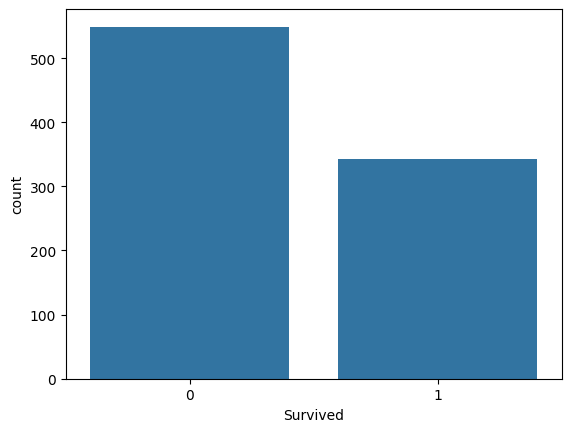

In [3]:
sb.countplot(x='Survived',data=df)
plt.show()

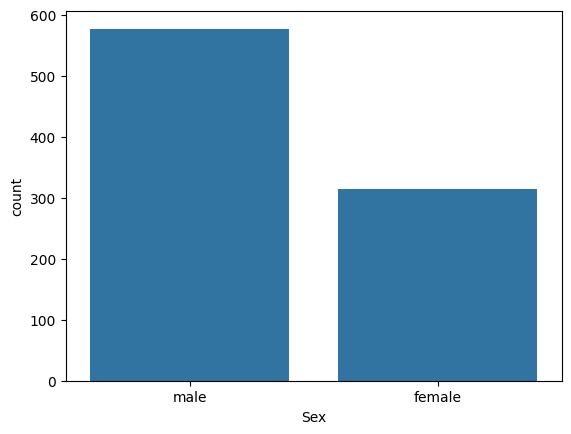

In [4]:
sb.countplot(x='Sex',data=df)
plt.show()

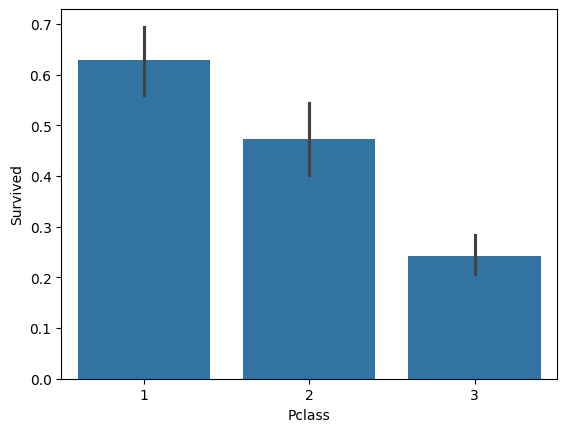

In [6]:
sb.barplot(x='Pclass',y='Survived',data=df)
plt.show()

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 40
        else:
            return 20
    else:
        return Age

In [12]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [13]:
df.drop('Cabin',inplace=True,axis=1)

In [14]:
most_comman_value='S'
for data in df:
    df['Embarked']=df['Embarked'].fillna(most_comman_value)

In [15]:
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [16]:
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [17]:
sex=pd.get_dummies(df['Sex'],drop_first=True,dtype=int)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True,dtype=int)

In [18]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [50]:
df=pd.concat([df,sex,Embarked],axis=1)

In [51]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.30,random_state=50)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred=logmodel.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [57]:
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

114 / 624


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
print('accuracy',100*accuracy_score(y_test,y_pred))

accuracy 81.73076923076923


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[341,  44],
       [ 70, 169]])

In [62]:
import numpy as np

In [63]:
np.where(y_pred!=y_test)

(array([  1,   3,   5,  19,  27,  33,  43,  55,  60,  62,  67,  74,  75,
         84,  86,  91, 103, 104, 116, 118, 130, 133, 142, 145, 146, 148,
        151, 153, 156, 159, 163, 166, 168, 173, 185, 210, 218, 220, 226,
        230, 236, 240, 242, 243, 244, 251, 259, 269, 274, 280, 281, 283,
        287, 289, 295, 296, 311, 316, 324, 333, 348, 349, 351, 352, 362,
        363, 364, 376, 386, 388, 391, 407, 409, 411, 436, 447, 449, 455,
        468, 471, 476, 477, 484, 485, 499, 500, 505, 507, 515, 517, 520,
        533, 539, 546, 552, 553, 555, 558, 560, 562, 565, 579, 580, 586,
        593, 595, 602, 607, 612, 614, 618, 620, 621, 622]),)